1. Import Necessary Libraries

In [ ]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [ ]:
#load the dataset
data = pd.read_csv("../data/raw/spam.csv", encoding="latin-1")

#display the first few rows
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


3. Understand the Dataset

In [ ]:
#Shape of the Dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (5572, 2)


In [14]:
#Column Names and Data Types
print("Column names: ", data.columns)
print("Data Types: ", data.dtypes)

Column names:  Index(['Category', 'Message'], dtype='object')
Data Types:  Category    object
Message     object
dtype: object


In [16]:
#checking missing values
print("Missing Values: \n", data.isnull().sum())

Missing Values: 
 Category    0
Message     0
dtype: int64


In [ ]:
# Class Distribution
print(data['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


4. Descriptive Statistics

In [ ]:
# Analyze numeric and categorical data
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
print(data['Category'].value_counts(normalize=True))  # Check class balance


Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


5. Visualize the Dataset

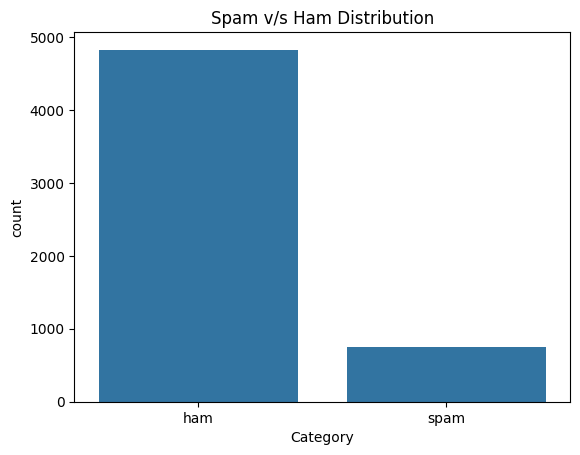

In [26]:
# Class Distribution
sns.countplot(x='Category', data=data)
plt.title("Spam v/s Ham Distribution")
plt.show()

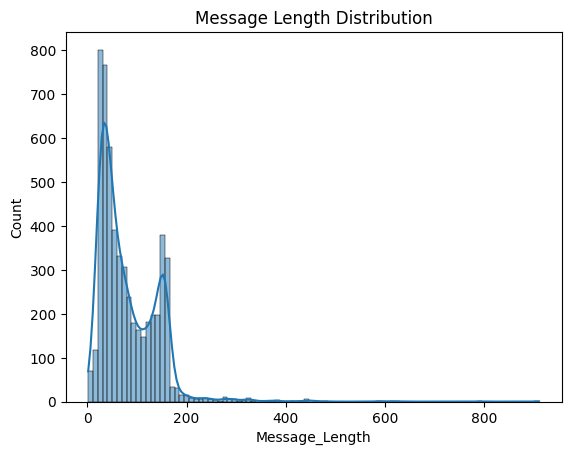

In [ ]:
# Word Count Distribution
data["Message_Length"] = data["Message"].apply(len)
sns.histplot(data['Message_Length'], kde=True)
plt.title("Message Length Distribution")
plt.show()

6. Analyze Text Data

In [32]:
# Sample Spam and Non-Spam Messages
print("Sample Spam Message: \n", data[data["Category"] == "spam"].iloc[0]) #iloc - index location
print("Sample Ham Message: \n", data[data["Category"] == "ham"].iloc[0])

Sample Spam Message: 
 Category                                                       spam
Message           Free entry in 2 a wkly comp to win FA Cup fina...
Message_Length                                                  155
Name: 2, dtype: object
Sample Ham Message: 
 Category                                                        ham
Message           Go until jurong point, crazy.. Available only ...
Message_Length                                                  111
Name: 0, dtype: object


In [39]:
#Word Frequency Analysis
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#Count Most Common Words in Spam Messages
spam_messages = data[data['Category'] == 'spam']['Message']
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(spam_messages)
common_words = Counter(vectorizer.get_feature_names_out()).most_common(10)
print(common_words)

[('00', 1), ('000', 1), ('008704050406', 1), ('0089', 1), ('0121', 1), ('01223585236', 1), ('01223585334', 1), ('02', 1), ('0207', 1), ('02072069400', 1)]


7.Identify Data Issues 

In [ ]:
#Duplicates
print("Number of duplicates:", data.duplicated().sum())


Number of duplicates: 415
